<a href="https://colab.research.google.com/github/nhattminh160901/Bai_Tap/blob/main/DoAn_2022/17_3_2022/hq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bài 1: Hãy trình bày cách đọc 1 tập dữ liệu vào bộ nhớ (ví dụ: Iris). Yêu cầu giải thích bằng lời và
triển khai bằng code sau đó.

Mỗi loại có 50 bông hoa được đo với dữ liệu là 4 thông tin: chiều dài, chiều rộng đài hoa (sepal), và chiều dài, chiều rộng cánh hoa (petal).

Iris flower dataset có sẵn trong thư viện scikit-learn.

In [197]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import datasets

In [198]:
iris = datasets.load_iris()
iris_x = iris.data
iris_y = iris.target

In [199]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [200]:
iris_x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [201]:
iris_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Bài 2: Từ tập dữ liệu trong bộ nhớ nêu trên, hãy tiến hành mô tả bằng các thông số thống kê mô tả
và hình vẽ tương ứng.

In [202]:
np.apply_along_axis(np.mean, 0, iris_x)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [203]:
np.apply_along_axis(np.median, 0, iris_x)

array([5.8 , 3.  , 4.35, 1.3 ])

In [204]:
np.apply_along_axis(np.var, 0, iris_x)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [205]:
np.apply_along_axis(np.std, 0, iris_x)

array([0.82530129, 0.43441097, 1.75940407, 0.75969263])

In [206]:
np.apply_along_axis(stats.mode, 0, iris_x)

array([[[ 5. ,  3. ,  1.4,  0.2]],

       [[10. , 26. , 13. , 29. ]]])

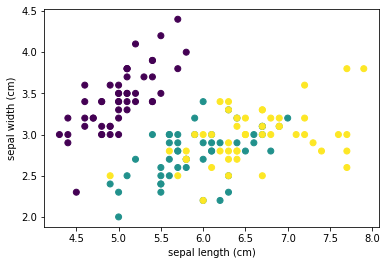

In [207]:
x_index = 0
y_index = 1

plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.show()

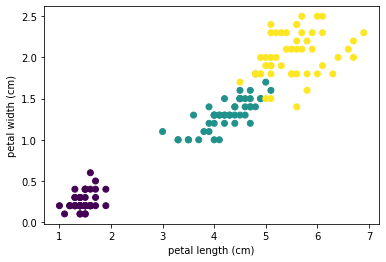

In [208]:
x_index = 2
y_index = 3

plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.show()

Bài 3: Từ tập dữ liệu trong bộ nhớ nêu trên, hãy:
- Trình bày cách xác định dữ liệu và xác định nhãn lớp. Code tương ứng
- Trình bày cách chia tập dữ liệu ban đầu thành tập dữ liệu huấn luyện và tập dữ liệu kiểm
thử. Code tương ứng.

In [209]:
iris.feature_names[0]

'sepal length (cm)'

In [210]:
iris.feature_names[1]

'sepal width (cm)'

In [211]:
iris.feature_names[2]

'petal length (cm)'

In [212]:
iris.feature_names[3]

'petal width (cm)'

In [213]:
x0 = iris_x[iris_y == 0,:]
print("class 1:", iris.target_names[0])
print(len(x0))
x0

class 1: setosa
50


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [214]:
x1 = iris_x[iris_y == 1,:]
print("class 2:", iris.target_names[1])
print(len(x1))
x1

class 2: versicolor
50


array([[7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [6.5, 2.8, 4.6, 1.5],
       [5.7, 2.8, 4.5, 1.3],
       [6.3, 3.3, 4.7, 1.6],
       [4.9, 2.4, 3.3, 1. ],
       [6.6, 2.9, 4.6, 1.3],
       [5.2, 2.7, 3.9, 1.4],
       [5. , 2. , 3.5, 1. ],
       [5.9, 3. , 4.2, 1.5],
       [6. , 2.2, 4. , 1. ],
       [6.1, 2.9, 4.7, 1.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.7, 3.1, 4.4, 1.4],
       [5.6, 3. , 4.5, 1.5],
       [5.8, 2.7, 4.1, 1. ],
       [6.2, 2.2, 4.5, 1.5],
       [5.6, 2.5, 3.9, 1.1],
       [5.9, 3.2, 4.8, 1.8],
       [6.1, 2.8, 4. , 1.3],
       [6.3, 2.5, 4.9, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [6.4, 2.9, 4.3, 1.3],
       [6.6, 3. , 4.4, 1.4],
       [6.8, 2.8, 4.8, 1.4],
       [6.7, 3. , 5. , 1.7],
       [6. , 2.9, 4.5, 1.5],
       [5.7, 2.6, 3.5, 1. ],
       [5.5, 2.4, 3.8, 1.1],
       [5.5, 2.4, 3.7, 1. ],
       [5.8, 2.7, 3.9, 1.2],
       [6. , 2.7, 5.1, 1.6],
       [5.4, 3

In [215]:
x2 = iris_x[iris_y == 2,:]
print("class 3:", iris.target_names[2])
print(len(x2))
x2

class 3: virginica
50


array([[6.3, 3.3, 6. , 2.5],
       [5.8, 2.7, 5.1, 1.9],
       [7.1, 3. , 5.9, 2.1],
       [6.3, 2.9, 5.6, 1.8],
       [6.5, 3. , 5.8, 2.2],
       [7.6, 3. , 6.6, 2.1],
       [4.9, 2.5, 4.5, 1.7],
       [7.3, 2.9, 6.3, 1.8],
       [6.7, 2.5, 5.8, 1.8],
       [7.2, 3.6, 6.1, 2.5],
       [6.5, 3.2, 5.1, 2. ],
       [6.4, 2.7, 5.3, 1.9],
       [6.8, 3. , 5.5, 2.1],
       [5.7, 2.5, 5. , 2. ],
       [5.8, 2.8, 5.1, 2.4],
       [6.4, 3.2, 5.3, 2.3],
       [6.5, 3. , 5.5, 1.8],
       [7.7, 3.8, 6.7, 2.2],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.2, 5. , 1.5],
       [6.9, 3.2, 5.7, 2.3],
       [5.6, 2.8, 4.9, 2. ],
       [7.7, 2.8, 6.7, 2. ],
       [6.3, 2.7, 4.9, 1.8],
       [6.7, 3.3, 5.7, 2.1],
       [7.2, 3.2, 6. , 1.8],
       [6.2, 2.8, 4.8, 1.8],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2.8, 5.6, 2.1],
       [7.2, 3. , 5.8, 1.6],
       [7.4, 2.8, 6.1, 1.9],
       [7.9, 3.8, 6.4, 2. ],
       [6.4, 2.8, 5.6, 2.2],
       [6.3, 2.8, 5.1, 1.5],
       [6.1, 2

In [243]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(iris_x, iris_y, test_size = 0.33)

Bài 4: Hãy trình bày lý thuyết về phương pháp 10-fold cross validation và code minh họa

Cross validation là một kỹ thuật lấy mẫu để đánh giá mô hình học máy trong trường hợp dữ liệu không được dồi dào cho lắm.

Tham số quan trọng trong kỹ thuật này là k, đại diện cho số nhóm mà dữ liệu sẽ được chia ra. Vì lý do đó, nó được mang tên k-fold cross-validation. Khi giá trị của k được lựa chọn, người ta sử dụng trực tiếp giá trị đó trong tên của phương pháp đánh giá. Ví dụ với k=10, phương pháp sẽ mang tên 10-fold cross-validation.

In [260]:
dataset = np.concatenate((iris_x, iris_y.reshape(150, 1)), axis=1)
# np.concatenate((a, b.T), axis=1)

In [261]:
np.random.shuffle(dataset)
z = np.array_split(dataset, 10)

In [262]:
train1 = np.concatenate(z[:9])
test1 = np.concatenate(z[9:])
x_train_1 = train1[:, :4]
y_train_1 = train1[:, 4]
x_test_1 = test1[:, :4]
y_test_1 = test1[:, 4]

In [263]:
train2 = np.concatenate(z[4:8])
test2_ = np.concatenate(z[0:3])
test2__ = np.concatenate(z[7:10])
test2 = np.concatenate((test2_, test2__))
x_train_2 = train2[:, :4]
y_train_2 = train2[:, 4]
x_test_2 = test2[:, :4]
y_test_2 = test2[:, 4]

Bài 5: Hãy trình bày lý thuyết về các chủ điểm sau:
- Bias là gì?
- Overfitting là gì?
- RMSE là gì?
- Precision là gì?

Bias: nghĩa là độ lệch, biểu thị sự chênh lệch giữa giá trị trung bình mà mô hình dự đoán và giá trị thực tế của dữ liệu.

Overfitting là hiện tượng mô hình tìm được quá khớp với dữ liệu training. Việc quá khớp này có thể dẫn đến việc dự đoán nhầm nhiễu, và chất lượng mô hình không còn tốt trên dữ liệu test nữa. Dữ liệu test được giả sử là không được biết trước, và không được sử dụng để xây dựng các mô hình Machine Learning.

RMSE: (Lỗi bình phương trung bình gốc), MSE: (Lỗi bình phương trung bình) RMD (Độ lệch bình phương trung bình gốc) và RMS: (Bình phương trung bình gốc), thì việc yêu cầu thư viện tính toán điều này cho bạn là không cần thiết. . Tất cả các chỉ số này là một dòng mã python dài tối đa là 2 inch. Ba chỉ số rmse, mse, rmd và rms về cơ bản là giống hệt nhau về mặt khái niệm.

RMSE trả lời cho câu hỏi: "Làm thế nào tương tự, trên trung bình, là những con số trong list1để list2?". Hai danh sách phải có cùng kích thước. Tôi muốn "loại bỏ nhiễu giữa hai yếu tố nhất định bất kỳ, loại bỏ kích thước của dữ liệu được thu thập và có được một con số duy nhất cảm nhận được sự thay đổi theo thời gian".

Precision được định nghĩa là số lượng kết quả dương tính đúng trên số lượng kết quả dương tính đúng cộng với số lượng kết quả xác thực sai

Bài 6: Hãy trình bày phương pháp đánh giá mô hình bằng cách sử dụng tập dữ liệu kiểm thử (test
dataset) và code tương ứng

In [264]:
#K-nearest neighbors
from sklearn import neighbors
from sklearn.metrics import accuracy_score

clf_1 = neighbors.KNeighborsClassifier(n_neighbors = 10, p = 2)
clf_1.fit(x_train_1, y_train_1)
y_pred_1 = clf_1.predict(x_test_1)
y_pred_1

array([0., 1., 2., 1., 0., 2., 2., 0., 1., 1., 2., 1., 2., 2., 2.])

In [265]:
y_test_1

array([0., 1., 2., 1., 0., 2., 2., 0., 1., 1., 2., 1., 2., 2., 1.])

In [266]:
print("Accuracy of 10NN:", 100*accuracy_score(y_test_1, y_pred_1),"%")

Accuracy of 10NN: 93.33333333333333 %


In [252]:
#LinearRegression
from sklearn import linear_model
lnreg = linear_model.LinearRegression().fit(x_train_2, y_train_2)

In [273]:
print("coefficient:", lnreg.coef_)
print("intercept:", 100*lnreg.intercept_, "%")
print("train score:", 100*lnreg.score(x_train_2, y_train_2), "%")
print("test score:", 100*lnreg.score(x_test_2, y_test_2), "%")

coefficient: [-0.1610504   0.0573525   0.3128864   0.46319252]
intercept: 0.6729806326982279 %
train score: 92.86126630198997 %
test score: 92.75448258560178 %


Bài 7: Bạn hãy lựa chọn 1 tập dữ liệu phù hợp với bài toán hồi quy tuyến tính và xây dựng mô
hình hồi quy tuyến tính theo từng bước (kèm với mô tả của từng bước)
- Bước 1: Tải dữ liệu
- Bước 2: Mô tả dữ liệu
- Bước 3: Phân chia train – test (tỉ lệ 70% -30%)
- Bước 4: Huấn luyện mô hình với train set (10-fold cross validation)
- Bước 5: Kiểm thử mô hình với test set
- Bước 6: Trình bày kết quả và nhận xét

Sử dụng dataset iris ở trên và chia theo tỷ lệ 70-30%

In [274]:
train_ = np.concatenate(z[:7])
test_ = np.concatenate(z[7:])
x_train_ = train_[:, :4]
y_train_ = train_[:, 4]
x_test_ = test_[:, :4]
y_test_ = test_[:, 4]

In [275]:
lnreg_ = linear_model.LinearRegression().fit(x_train_, y_train_)

In [276]:
print("coefficient:", lnreg_.coef_)
print("intercept:", 100*lnreg_.intercept_, "%")
print("train score:", 100*lnreg_.score(x_train_, y_train_), "%")
print("test score:", 100*lnreg_.score(x_test_, y_test_), "%")

coefficient: [-0.07225117 -0.06639404  0.19678858  0.64321463]
intercept: 11.693388883652943 %
train score: 92.93101180000838 %
test score: 93.14888726147979 %


Bài 8: Bạn hãy lựa chọn 1 tập dữ liệu phù hợp với bài toán hồi quy phi tuyến và xây dựng mô
hình hồi quy phi tuyến theo từng bước (kèm với mô tả của từng bước)
- Bước 1: Tải dữ liệu
- Bước 2: Mô tả dữ liệu
- Bước 3: Phân chia train – test (tỉ lệ 70% -30%)
- Bước 4: Huấn luyện mô hình với train set (10-fold cross validation)
- Bước 5: Kiểm thử mô hình với test set
- Bước 6: Trình bày kết quả và nhận xét

Sử dụng dataset iris ở trên và chia theo tỷ lệ 70-30%

Bài 9: Bạn hãy lựa chọn 1 tập dữ liệu phù hợp với bài toán hồi quy logistic và xây dựng mô hình
hồi quy logistic theo từng bước (kèm với mô tả của từng bước)
- Bước 1: Tải dữ liệu
- Bước 2: Mô tả dữ liệu
- Bước 3: Phân chia train – test (tỉ lệ 70% -30%)
- Bước 4: Huấn luyện mô hình với train set (10-fold cross validation)
- Bước 5: Kiểm thử mô hình với test set
- Bước 6: Trình bày kết quả và nhận xét

In [277]:
loreg = linear_model.LogisticRegression().fit(x_train_, y_train_)

In [278]:
print("coefficient:", loreg.coef_)
print("intercept:", 100*loreg.intercept_, "%")
print("train score:", 100*loreg.score(x_train_, y_train_), "%")
print("test score:", 100*loreg.score(x_test_, y_test_), "%")

coefficient: [[-0.43048664  0.81322031 -2.34049619 -0.96137617]
 [ 0.45246235 -0.06680298 -0.12859615 -0.8445387 ]
 [-0.02197571 -0.74641732  2.46909234  1.80591486]]
intercept: [  959.1016504    127.55497841 -1086.65662881] %
train score: 98.09523809523809 %
test score: 97.77777777777777 %
